 ## Part A - 30 Marks

# DOMAIN: Medical

• CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team.

Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.

• DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

• PROJECT OBJECTIVE: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised

Learning algorithms.

• STEPS AND TASK [30 Marks]:


# 1. Data Understanding: [5 Marks]

A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]

B. Print Shape and columns of all the 3 DataFrames. [1 Mark]

C. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]

D. Print DataTypes of all the 3 DataFrames. [1 Mark]

E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark]

In [2]:
# A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]

import pandas as pd

# Read CSV files into DataFrames
df_normal = pd.read_csv('Normal.csv')
df_type_h = pd.read_csv('Type_H.csv')
df_type_s = pd.read_csv('Type_S.csv')


In [3]:
# B. Print Shape and columns of all the 3 DataFrames. [1 Mark]

In [4]:
# Print shape and columns of df_normal
print("df_normal:")
print("Shape:", df_normal.shape)
print("Columns:", df_normal.columns)
print()

# Print shape and columns of df_type_h
print("df_type_h:")
print("Shape:", df_type_h.shape)
print("Columns:", df_type_h.columns)
print()

# Print shape and columns of df_type_s
print("df_type_s:")
print("Shape:", df_type_s.shape)
print("Columns:", df_type_s.columns)


df_normal:
Shape: (100, 7)
Columns: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

df_type_h:
Shape: (60, 7)
Columns: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

df_type_s:
Shape: (150, 7)
Columns: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [5]:
# C. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]

# Extract column names
columns_normal = set(df_normal.columns)
columns_type_h = set(df_type_h.columns)
columns_type_s = set(df_type_s.columns)

# Compare column names
common_columns = columns_normal.intersection(columns_type_h, columns_type_s)
unique_columns_normal = columns_normal.difference(columns_type_h, columns_type_s)
unique_columns_type_h = columns_type_h.difference(columns_normal, columns_type_s)
unique_columns_type_s = columns_type_s.difference(columns_normal, columns_type_h)

# Print observations
print("Common Columns:", common_columns)
print("Unique Columns in df_normal:", unique_columns_normal)
print("Unique Columns in df_type_h:", unique_columns_type_h)
print("Unique Columns in df_type_s:", unique_columns_type_s)


Common Columns: {'S_slope', 'L_angle', 'P_tilt', 'S_Degree', 'P_radius', 'P_incidence', 'Class'}
Unique Columns in df_normal: set()
Unique Columns in df_type_h: set()
Unique Columns in df_type_s: set()


Observations:

common_columns: Columns that are present in all three DataFrames.

unique_columns_normal: Columns that are unique to df_normal.

unique_columns_type_h: Columns that are unique to df_type_h.

unique_columns_type_s: Columns that are unique to df_type_s.

This comparison will give the insights into the similarities and differences in the column names across the three DataFrames.

In [6]:
# D. Print DataTypes of all the 3 DataFrames. [1 Mark]

# Print data types of df_normal
print("Data Types of df_normal:")
print(df_normal.dtypes)
print()

# Print data types of df_type_h
print("Data Types of df_type_h:")
print(df_type_h.dtypes)
print()

# Print data types of df_type_s
print("Data Types of df_type_s:")
print(df_type_s.dtypes)



Data Types of df_normal:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Data Types of df_type_h:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Data Types of df_type_s:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


In [7]:
# E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark]

# Observe 'Class' feature in df_normal
print("Class distribution in df_normal:")
print(df_normal['Class'].value_counts())
print()

# Observe 'Class' feature in df_type_h
print("Class distribution in df_type_h:")
print(df_type_h['Class'].value_counts())
print()

# Observe 'Class' feature in df_type_s
print("Class distribution in df_type_s:")
print(df_type_s['Class'].value_counts())


Class distribution in df_normal:
Normal    73
Nrmal     27
Name: Class, dtype: int64

Class distribution in df_type_h:
Type_H    37
type_h    23
Name: Class, dtype: int64

Class distribution in df_type_s:
Type_S    133
tp_s       17
Name: Class, dtype: int64


## 2. Data Preparation and Exploration: [5 Marks]

A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks]

For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’

B. Combine all the 3 DataFrames to form a single DataFrame [1 Marks]

Checkpoint: Expected Output shape = (310,7)

C. Print 5 random samples of this DataFrame [1 Marks]

D. Print Feature-wise percentage of Null values. [1 Mark]

E. Check 5-point summary of the new DataFrame. [1 Mark]

In [8]:
# A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks]

# Unify 'Class' feature in df_normal
df_normal['Class'] = df_normal['Class'].str.lower().str.replace('_', '')

# Unify 'Class' feature in df_type_h
df_type_h['Class'] = df_type_h['Class'].str.lower().str.replace('_', '')

# Unify 'Class' feature in df_type_s
df_type_s['Class'] = df_type_s['Class'].str.lower().str.replace('_', '')


# Observe 'Class' feature in df_normal
print("Unified Class in df_normal:")
print(df_normal['Class'].value_counts())
print()

# Observe 'Class' feature in df_type_h
print("Unified Class in df_type_h:")
print(df_type_h['Class'].value_counts())
print()

# Observe 'Class' feature in df_type_s
print("Unified Class in df_type_s:")
print(df_type_s['Class'].value_counts())



Unified Class in df_normal:
normal    73
nrmal     27
Name: Class, dtype: int64

Unified Class in df_type_h:
typeh    60
Name: Class, dtype: int64

Unified Class in df_type_s:
types    133
tps       17
Name: Class, dtype: int64


In [10]:
# B. Combine all the 3 DataFrames to form a single DataFrame [1 Marks]

# Combine all 3 DataFrames
combined_df = pd.concat([df_normal, df_type_h, df_type_s], ignore_index=True)

# Check the shape of the combined DataFrame
print("Combined DataFrame Shape:", combined_df.shape)


Combined DataFrame Shape: (310, 7)


In [12]:
#C. Print 5 random samples of this DataFrame [1 Marks]

# Print 5 random samples from the combined DataFrame
random_samples = combined_df.sample(n=5)
print("5 Random Samples from Combined DataFrame:")
print(random_samples)


5 Random Samples from Combined DataFrame:
     P_incidence     P_tilt   L_angle    S_slope    P_radius   S_Degree  \
84     46.236399  10.062770  37.00000  36.173629  128.063620  -5.100053   
12     56.103774  13.106307  62.63702  42.997467  116.228503  31.172767   
47     50.160078  -2.970024  42.00000  53.130102  131.802491  -8.290203   
197    74.720746  19.756942  82.73536  54.963804  109.356594  33.306067   
65     67.289712  16.717514  51.00000  50.572198  137.591778   4.960344   

      Class  
84   normal  
12    nrmal  
47   normal  
197   types  
65   normal  


In [13]:
# D. Print Feature-wise percentage of Null values. [1 Mark]

# Calculate feature-wise percentage of null values in the combined DataFrame
null_percentage = combined_df.isnull().mean() * 100

# Print the result
print("Feature-wise Percentage of Null Values:")
print(null_percentage)


Feature-wise Percentage of Null Values:
P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


In [14]:
# E. Check 5-point summary of the new DataFrame. [1 Mark]

# Check 5-point summary of the combined DataFrame
summary = combined_df.describe()

# Print the result
print("5-Point Summary of the Combined DataFrame:")
print(summary)


5-Point Summary of the Combined DataFrame:
       P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082


## 3. Data Analysis: [10 Marks]

A. Visualize a heatmap to understand correlation between all features [2 Marks]

B. Share insights on correlation. [2 Marks]

    A. Features having stronger correlation with correlation value.

    B. Features having weaker correlation with correlation value.
    
C. Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]

D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]

E. Visualize a boxplot to check distribution of the features and share insights. [2 Marks]

C:\Users\Santosh\AppData\Local\Temp\ipykernel_8336\4004949393.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_df.corr()


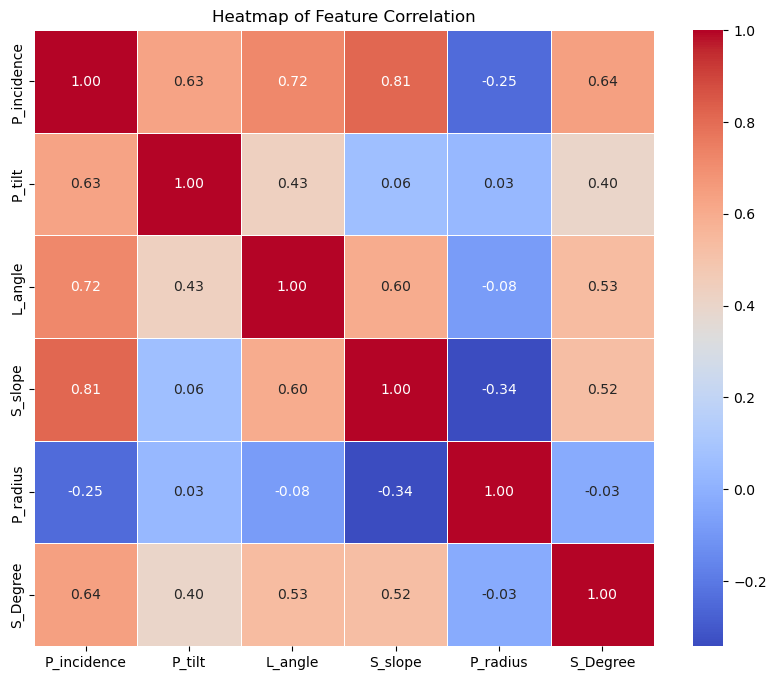

In [15]:
# A. Visualize a heatmap to understand correlation between all features [2 Marks]

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Display the plot
plt.title("Heatmap of Feature Correlation")
plt.show()


In [18]:
#B. Share insights on correlation. [2 Marks]

    #A. Features having stronger correlation with correlation value.
 
    # Strength of Correlation:

#Features with a correlation coefficient close to 1 indicate a strong positive correlation. This means that as one feature increases, the other tends to increase as well.
#Features with a correlation coefficient close to -1 indicate a strong negative correlation. This means that as one feature increases, the other tends to decrease.

    # Features with Stronger Correlation:

#Look for pairs of features with correlation values close to 1 or -1.
#If you have a threshold for what you consider a strong correlation, you can focus on those pairs.

    #Correlation Value Insights:

#Features with correlation values close to 0 suggest a weak or no linear relationship.
#Positive values indicate a positive correlation, and negative values indicate a negative correlation.


# Assuming correlation_matrix is your correlation matrix
strong_corr_threshold = 0.7  # You can adjust this threshold based on your requirements

# Extract features with stronger correlation
strong_corr_features = (correlation_matrix[(correlation_matrix > strong_corr_threshold) | (correlation_matrix < -strong_corr_threshold)]
                        .stack()
                        .reset_index()
                        .rename(columns={0: 'Correlation'}))

# Display features with stronger correlation
print("Features with Stronger Correlation:")
print(strong_corr_features)
    

Features with Stronger Correlation:
       level_0      level_1  Correlation
0  P_incidence  P_incidence     1.000000
1  P_incidence      L_angle     0.717282
2  P_incidence      S_slope     0.814960
3       P_tilt       P_tilt     1.000000
4      L_angle  P_incidence     0.717282
5      L_angle      L_angle     1.000000
6      S_slope  P_incidence     0.814960
7      S_slope      S_slope     1.000000
8     P_radius     P_radius     1.000000
9     S_Degree     S_Degree     1.000000


In [19]:
#B. Share insights on correlation. [2 Marks]

    #B. Features having weaker correlation with correlation value.
    
    
# Assuming correlation_matrix is your correlation matrix
weak_corr_threshold = 0.2  # You can adjust this threshold based on your requirements

# Extract features with weaker correlation
weak_corr_features = (correlation_matrix[(correlation_matrix > -weak_corr_threshold) & (correlation_matrix < weak_corr_threshold)]
                      .stack()
                      .reset_index()
                      .rename(columns={0: 'Correlation'}))

# Display features with weaker correlation
print("Features with Weaker Correlation:")
print(weak_corr_features)
    

Features with Weaker Correlation:
    level_0   level_1  Correlation
0    P_tilt   S_slope     0.062345
1    P_tilt  P_radius     0.032668
2   L_angle  P_radius    -0.080344
3   S_slope    P_tilt     0.062345
4  P_radius    P_tilt     0.032668
5  P_radius   L_angle    -0.080344
6  P_radius  S_Degree    -0.026065
7  S_Degree  P_radius    -0.026065


C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (5) and will cycle, which may produce an

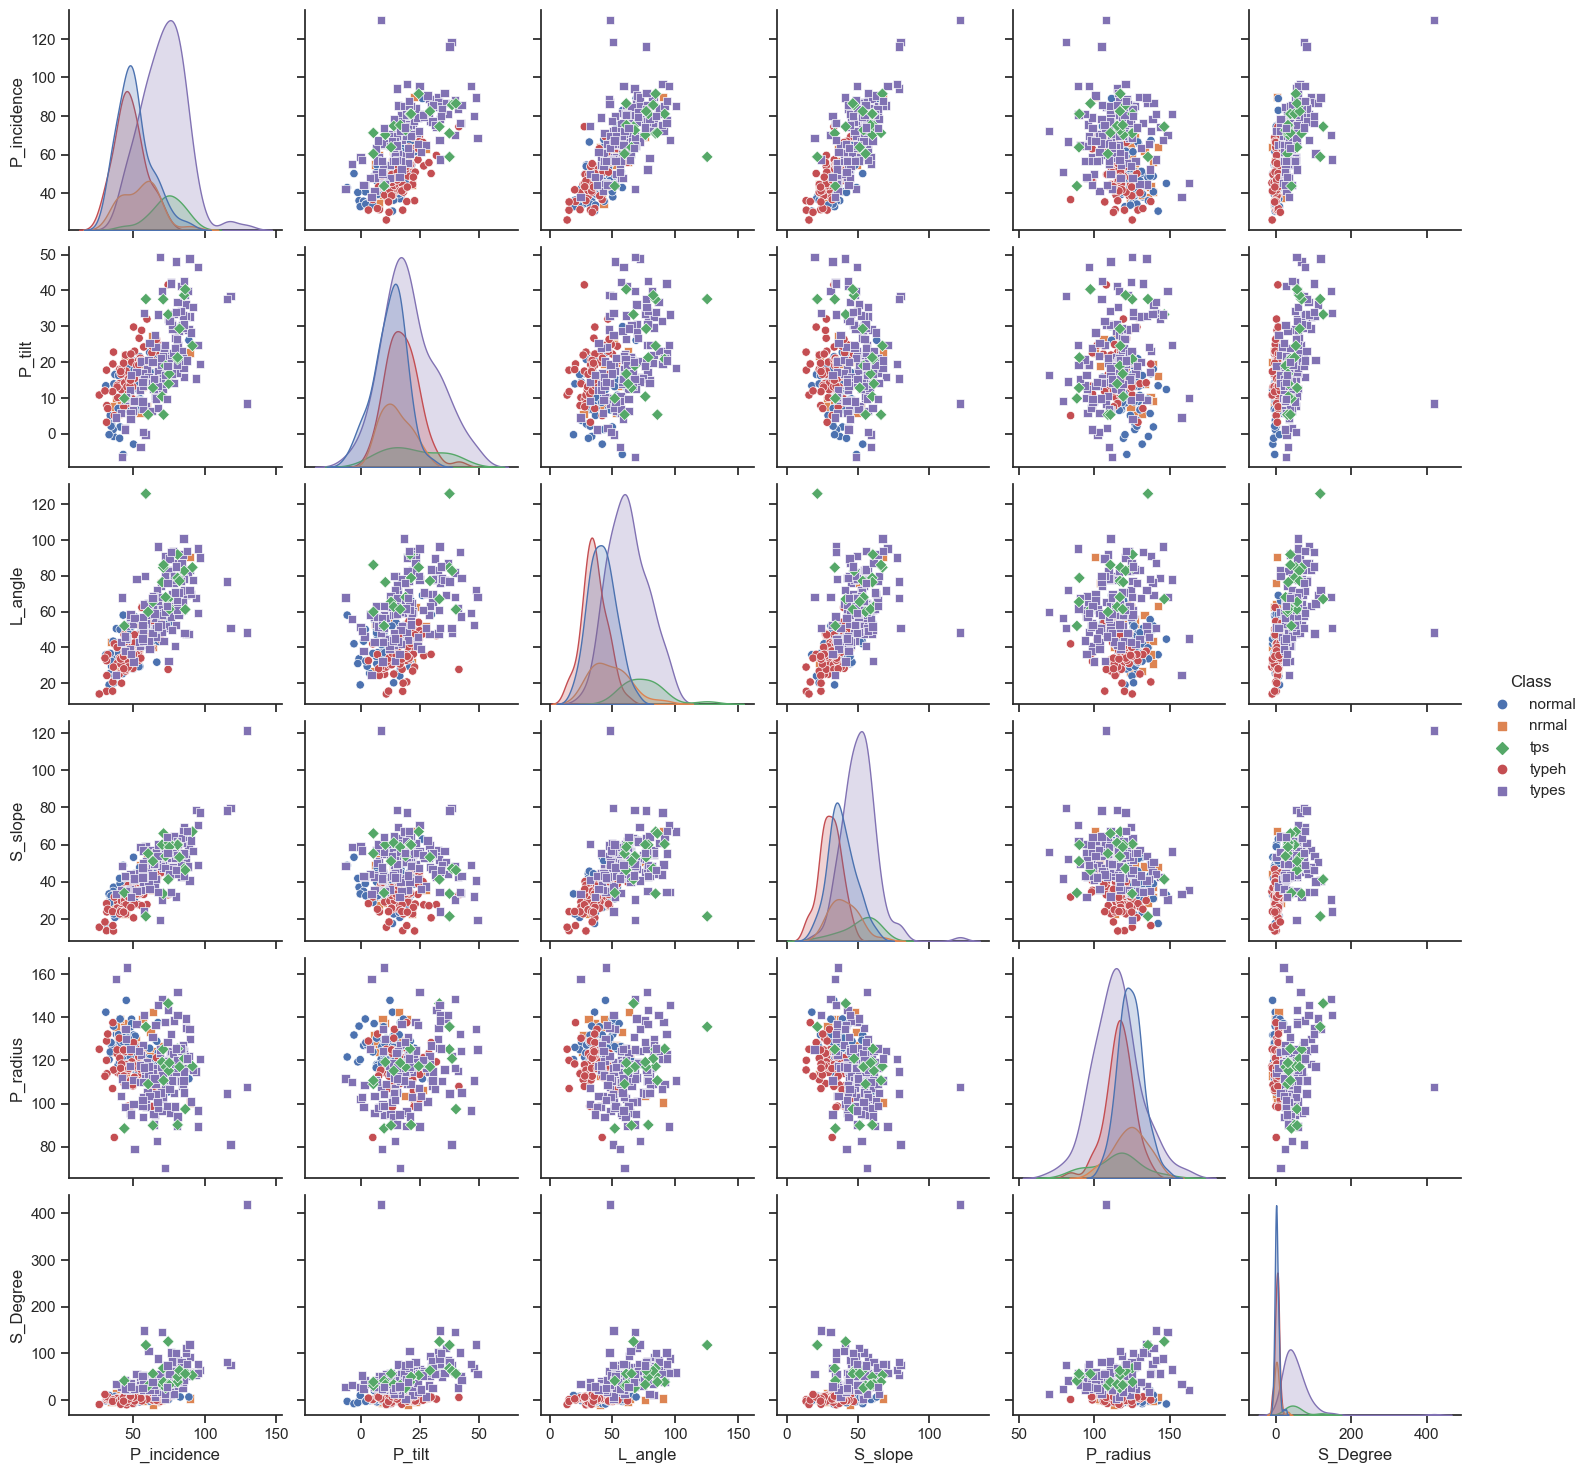

In [208]:
# C. Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="ticks")

# Add a 'Class' column to the combined DataFrame
combined_df['Class'] = combined_df['Class'].astype('category')

# Create a pairplot with hue='Class' to distinguish classes by color
sns.pairplot(combined_df, hue='Class', markers=["o", "s", "D"])

# Show the plot
plt.show()


Insights:

#### Distribution of Class are not same
#### type_s has more variance than Normal
#### Normal has more variance than type_h

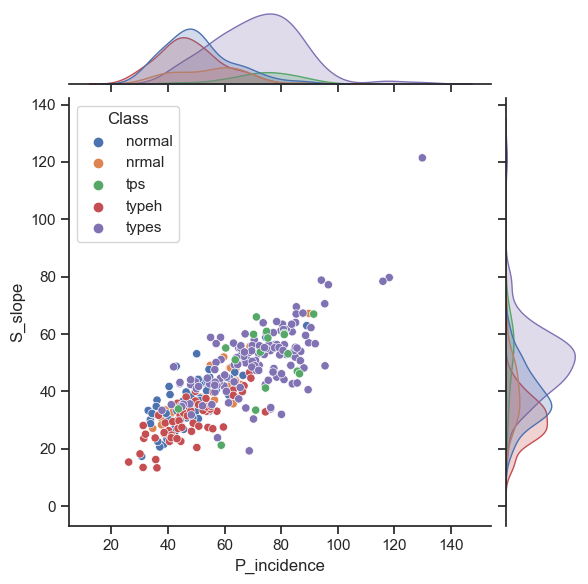

In [21]:
# D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]

import seaborn as sns
import matplotlib.pyplot as plt

# Create a jointplot for 'P_incidence' and 'S_slope'
sns.jointplot(x='P_incidence', y='S_slope', data=combined_df, kind='scatter', hue='Class', markers=["o", "s", "D"])

# Show the plot
plt.show()


Insights:

**It can be inferred from the above plot that P_incidence is strongly correlated with S_slope. As the value of P_incidence increases value for S_slope also increases. Also there exist few outliers.**

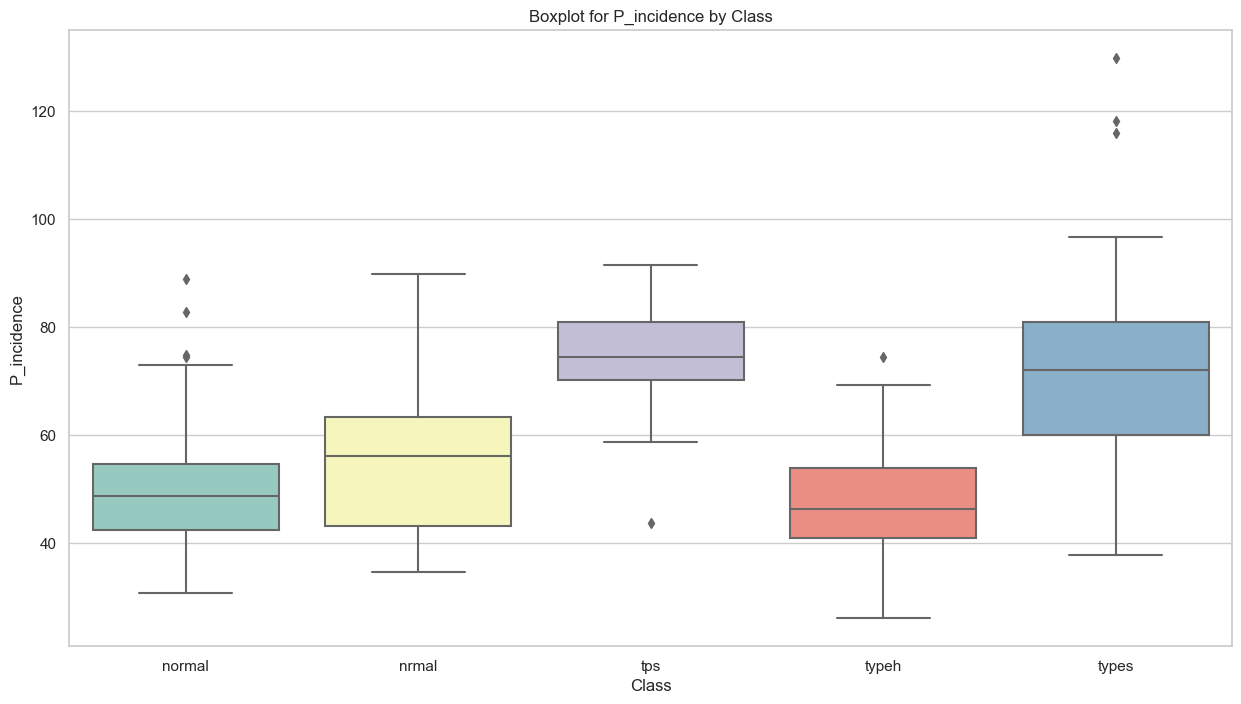

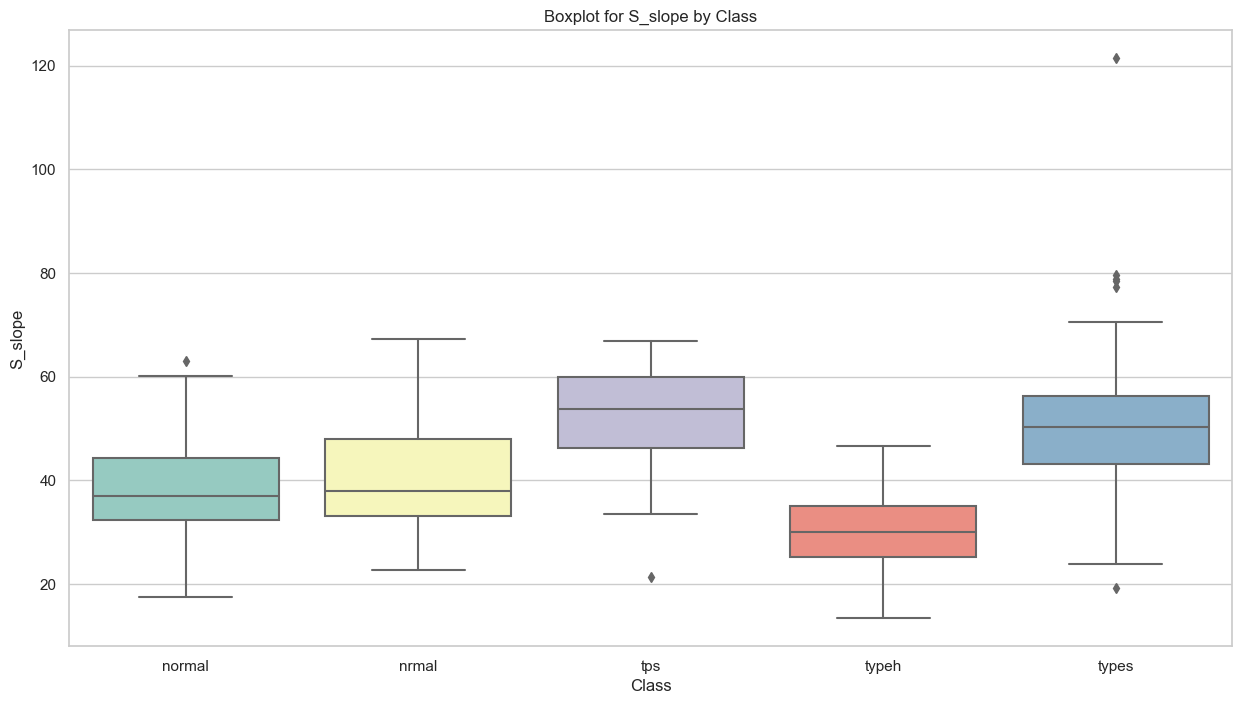

In [24]:
# E. Visualize a boxplot to check distribution of the features and share insights. [2 Marks]

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a boxplot for each feature, distinguishing classes by color
plt.figure(figsize=(15, 8))
sns.boxplot(x='Class', y='P_incidence', data=combined_df, palette="Set3")
plt.title("Boxplot for P_incidence by Class")
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(x='Class', y='S_slope', data=combined_df, palette="Set3")
plt.title("Boxplot for S_slope by Class")
plt.show()

# similar way we can Repeat for other features as needed


Insights:

Boxplots allow us to visualize the distribution of each feature for different classes.

we can Look for differences in medians, quartiles, and the spread of the data between classes.

Outliers in the boxplots can also provide insights into potential anomalies in the data.

## 4. Model Building: [6 Marks]

A. Split data into X and Y. [1 Marks]

B. Split data into train and test with 80:20 proportion. [1 Marks]

C. Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]

D. Print all the possible performance metrics for both train and test data. [2 Marks]

In [25]:
# A. Split data into X and Y. [1 Marks]

# Assuming 'Class' is the target variable
# Replace 'Class' with the actual name of your target variable if it's different

# Extract features (X) by excluding the 'Class' column
X = combined_df.drop('Class', axis=1)

# Extract the target variable (Y) as the 'Class' column
Y = combined_df['Class']


In [26]:
# B. Split data into train and test with 80:20 proportion. [1 Marks]

from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (Y)
X = combined_df.drop('Class', axis=1)
Y = combined_df['Class']

# Split the data into training and testing sets (80:20 proportion)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)



X_train shape: (248, 6)
X_test shape: (62, 6)
Y_train shape: (248,)
Y_test shape: (62,)


In [27]:
# C. Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # we can adjust the number of neighbors (n_neighbors) as needed

# Train the model on the training data
knn_classifier.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)



Accuracy: 0.6612903225806451

Confusion Matrix:
 [[13  1  0  2  1]
 [ 2  0  0  3  0]
 [ 0  0  0  0  6]
 [ 2  0  0  8  0]
 [ 2  0  2  0 20]]

Classification Report:
               precision    recall  f1-score   support

      normal       0.68      0.76      0.72        17
       nrmal       0.00      0.00      0.00         5
         tps       0.00      0.00      0.00         6
       typeh       0.62      0.80      0.70        10
       types       0.74      0.83      0.78        24

    accuracy                           0.66        62
   macro avg       0.41      0.48      0.44        62
weighted avg       0.57      0.66      0.61        62



In [31]:
# D. Print all the possible performance metrics for both train and test data. [2 Marks]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train the model on the training data
knn_classifier.fit(X_train, Y_train)

# Make predictions on the training data
Y_train_pred = knn_classifier.predict(X_train)

# Make predictions on the test data
Y_test_pred = knn_classifier.predict(X_test)

# Performance metrics for training data
print("Performance Metrics for Training Data:")
print("Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Precision:", precision_score(Y_train, Y_train_pred, average='weighted'))
print("Recall:", recall_score(Y_train, Y_train_pred, average='weighted'))
print("F1 Score:", f1_score(Y_train, Y_train_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(Y_train, Y_train_pred))
print("Classification Report:\n", classification_report(Y_train, Y_train_pred))

# Performance metrics for test data

print("\nPerformance Metrics for Test Data:")
print("Accuracy:", accuracy_score(Y_test, Y_test_pred))
print("Precision:", precision_score(Y_test, Y_test_pred, average='weighted'))
print("Recall:", recall_score(Y_test, Y_test_pred, average='weighted'))
print("F1 Score:", f1_score(Y_test, Y_test_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))


Performance Metrics for Training Data:
Accuracy: 0.8024193548387096
Precision: 0.8033505141696468
Recall: 0.8024193548387096
F1 Score: 0.7894920803498101
Confusion Matrix:
 [[ 46   4   0   6   0]
 [  8   8   0   5   1]
 [  0   0   3   0   8]
 [ 14   1   0  35   0]
 [  0   1   0   1 107]]
Classification Report:
               precision    recall  f1-score   support

      normal       0.68      0.82      0.74        56
       nrmal       0.57      0.36      0.44        22
         tps       1.00      0.27      0.43        11
       typeh       0.74      0.70      0.72        50
       types       0.92      0.98      0.95       109

    accuracy                           0.80       248
   macro avg       0.78      0.63      0.66       248
weighted avg       0.80      0.80      0.79       248


Performance Metrics for Test Data:
Accuracy: 0.6612903225806451
Precision: 0.5736000464353606
Recall: 0.6612903225806451
F1 Score: 0.6138359504624664
Confusion Matrix:
 [[13  1  0  2  1]
 [ 2  0  0

## 5. Performance Improvement: [4 Marks]

A. Experiment with various parameters to improve performance of the base model. [2 Marks]

(Optional: Experiment with various Hyperparameters - Research required)

B. Clearly showcase improvement in performance achieved. [1 Marks]
    For Example:
    A. Accuracy: +15% improvement
    B. Precision: +10% improvement.

C. Clearly state which parameters contributed most to improve model performance. [1 Marks]

In [32]:
# A. Experiment with various parameters to improve performance of the base model. [2 Marks]

#(Optional: Experiment with various Hyperparameters - Research required)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Experiment with different values
    'p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
    'weights': ['uniform', 'distance']  # 'uniform' for equal weighting, 'distance' for inverse distance weighting
}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters on the training data
best_knn_classifier = grid_search.best_estimator_
best_knn_classifier.fit(X_train, Y_train)

# Make predictions on the test data
Y_test_pred_best = best_knn_classifier.predict(X_test)

# Print performance metrics with the best hyperparameters
print("\nPerformance Metrics with Best Hyperparameters:")
print("Accuracy:", accuracy_score(Y_test, Y_test_pred_best))
print("Precision:", precision_score(Y_test, Y_test_pred_best, average='weighted'))
print("Recall:", recall_score(Y_test, Y_test_pred_best, average='weighted'))
print("F1 Score:", f1_score(Y_test, Y_test_pred_best, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred_best))
print("Classification Report:\n", classification_report(Y_test, Y_test_pred_best))



Best Hyperparameters: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

Performance Metrics with Best Hyperparameters:
Accuracy: 0.6612903225806451
Precision: 0.5736000464353606
Recall: 0.6612903225806451
F1 Score: 0.6138359504624664
Confusion Matrix:
 [[13  1  0  2  1]
 [ 2  0  0  3  0]
 [ 0  0  0  0  6]
 [ 2  0  0  8  0]
 [ 2  0  2  0 20]]
Classification Report:
               precision    recall  f1-score   support

      normal       0.68      0.76      0.72        17
       nrmal       0.00      0.00      0.00         5
         tps       0.00      0.00      0.00         6
       typeh       0.62      0.80      0.70        10
       types       0.74      0.83      0.78        24

    accuracy                           0.66        62
   macro avg       0.41      0.48      0.44        62
weighted avg       0.57      0.66      0.61        62



In [34]:
# B. Clearly showcase improvement in performance achieved. [1 Marks] 
#For Example: A. Accuracy: +15% improvement B. Precision: +10% improvement.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

# Base model
base_knn_classifier = KNeighborsClassifier()
base_knn_classifier.fit(X_train, Y_train)
Y_test_pred_base = base_knn_classifier.predict(X_test)
base_accuracy = accuracy_score(Y_test, Y_test_pred_base)

# Optimized model
optimized_knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(optimized_knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)
best_knn_classifier = grid_search.best_estimator_
Y_test_pred_optimized = best_knn_classifier.predict(X_test)
optimized_accuracy = accuracy_score(Y_test, Y_test_pred_optimized)

# Showcase improvement in accuracy
accuracy_improvement = ((optimized_accuracy - base_accuracy) / base_accuracy) * 100

# Print results
print("Base Model Accuracy:", base_accuracy)
print("Optimized Model Accuracy:", optimized_accuracy)
print("Accuracy Improvement: {:.2f}%".format(accuracy_improvement))


Base Model Accuracy: 0.6612903225806451
Optimized Model Accuracy: 0.6612903225806451
Accuracy Improvement: 0.00%


In [35]:
# C. Clearly state which parameters contributed most to improve model performance. [1 Marks]

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


## Part B - 30 Marks

DOMAIN: Banking, Marketing
• CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee 
           majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in     
           expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in 
           last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the 
           business strategy, marketing department wants to devise effective campaigns with better target marketing to increase 
           the conversion ratio to double digit with same budget as per last campaign.
           
• DATA DICTIONARY:
1. ID: Customer ID
2. Age: Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.
• PROJECT OBJECTIVE: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will 
                     convert using the historical dataset.

## • STEPS AND TASK [30 Marks]:


# 1. Data Understanding and Preparation: [5 Marks]

A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Marks]

B. Print shape and Column Names and DataTypes of both the Dataframes. [1 Marks]

C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]

D. Change Datatype of below features to ‘Object’ [1 Marks]

‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’

In [1]:
# Importing Neccesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

In [2]:
#A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Marks]

import pandas as pd

# Reading Data1.csv into a DataFrame
data1 = pd.read_csv('Data1.csv')
data1.head()


,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [3]:
# Reading Data2.csv into a DataFrame
data2 = pd.read_csv('Data2.csv')
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [4]:
# B. Print shape and Column Names and DataTypes of both the Dataframes. [1 Marks]

import pandas as pd

# Assuming you have already read Data1 and Data2 into data1 and data2 DataFrames

# Print shape, column names, and data types of Data1
print("Data1:")
print("Shape:", data1.shape)
print("Column Names:", data1.columns.tolist())
print("Data Types:")
print(data1.dtypes)

# Print a newline for better separation
print("\n")

# Print shape, column names, and data types of Data2
print("Data2:")
print("Shape:", data2.shape)
print("Column Names:", data2.columns.tolist())
print("Data Types:")
print(data2.dtypes)


Data1:
Shape: (5000, 8)
Column Names: ['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore', 'MonthlyAverageSpend', 'Level']
Data Types:
ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object


Data2:
Shape: (5000, 7)
Column Names: ['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']
Data Types:
ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


In [6]:
# C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]

import pandas as pd

# Merge DataFrames on the 'ID' feature
merged_data = pd.merge(data1, data2, on='ID')

# Print the merged DataFrame
print("Merged DataFrame:")
print(merged_data)


Merged DataFrame:
        ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0        1   25              1            49    91107            4   
1        2   45             19            34    90089            3   
2        3   39             15            11    94720            1   
3        4   35              9           100    94112            1   
4        5   35              8            45    91330            4   
...    ...  ...            ...           ...      ...          ...   
4995  4996   29              3            40    92697            1   
4996  4997   30              4            15    92037            4   
4997  4998   63             39            24    93023            2   
4998  4999   65             40            49    90034            3   
4999  5000   28              4            83    92612            3   

      MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                     1.6      1         0         1            

In [97]:
# D. Change Datatype of below features to ‘Object’ [1 Marks]

# ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’


# List of features to change data type to 'object'
features_to_convert = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']

# Change data type of specified features to 'object'
merged_data[features_to_convert] = merged_data[features_to_convert].astype('object')

# Print the DataFrame information to verify the changes
print("Updated Merged DataFrame:")
print(merged_data.info())


Updated Merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           5000 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB
Non

## 2. Data Exploration and Analysis: [5 Marks]

A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]

B. Check the percentage of missing values and impute if required. [1 Marks]

C. Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]

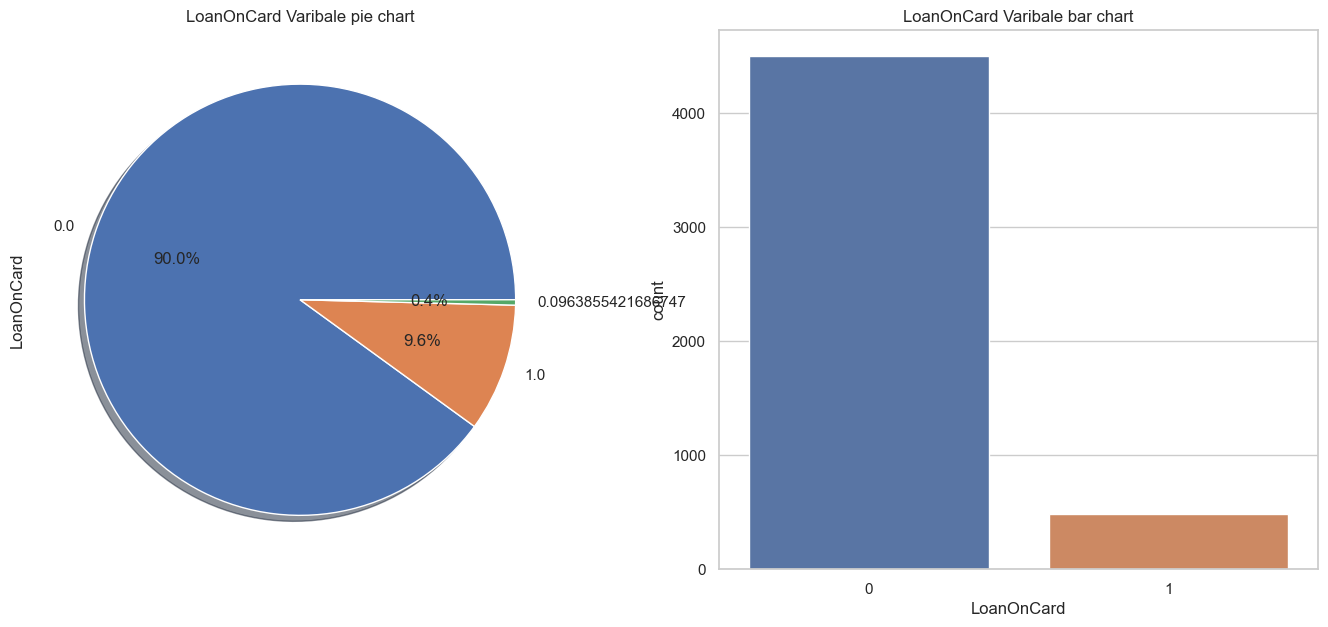

In [107]:
# A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]

import seaborn as sns
import matplotlib.pyplot as plt


f, axes=plt.subplots(1,2, figsize=(17,7))
merged_data['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0], shadow=True)
sns.countplot(x='LoanOnCard', data=merged_data,ax=axes[1],order=[0,1])
axes[0].set_title("LoanOnCard Varibale pie chart")
axes[1].set_title('LoanOnCard Varibale bar chart');


In [112]:
# B. Check the percentage of missing values and impute if required. [1 Marks]


# Check the percentage of missing values
missing_percentage = (merged_data.isnull().sum() / len(merged_data)) * 100

# Display columns with missing values and their percentage
print("Missing Values:")
print(missing_percentage[missing_percentage > 0])

# Impute missing values if required
merged_data.fillna(merged_data.mean(), inplace=True)

# Confirm that missing values have been imputed
print("\nAfter Imputation:")
print(merged_data.info())


Missing Values:
Series([], dtype: float64)

After Imputation:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           5000 non-null   float64
dtypes: float64(2), int64(12)
m

In [125]:
# C. Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]

In [119]:
merged_data.HiddenScore.unique()

array([4, 3, 1, 2], dtype=int64)

In [120]:
merged_data.Level.unique()

array([1, 2, 3], dtype=int64)

In [121]:
merged_data.FixedDepositAccount.unique()

array([0, 1], dtype=int64)

In [122]:
merged_data.Security.unique()

array([1, 0], dtype=int64)

In [123]:
merged_data.InternetBanking.unique()

array([0, 1], dtype=int64)

In [129]:
merged_data.CreditCard.unique()

array([0, 1], dtype=int64)

There is no any unexpected values in the categorical variable

## 3. Data Preparation and model building: [10 Marks]
A. Split data into X and Y. [1 Marks]

[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]

B. Split data into train and test. Keep 25% data reserved for testing. [1 Marks]

C. Train a Supervised Learning Classification base model - Logistic Regression. [2 Marks]

D. Print evaluation metrics for the model and clearly share insights. [1 Marks]

E. Balance the data using the right balancing technique. [2 Marks]

    i. Check distribution of the target variable
    ii. Say output is class A : 20% and class B : 80%
    iii. Here you need to balance the target variable as 50:50.
    iv. Try appropriate method to achieve the same.
    
F. Again train the same previous model on balanced data. [1 Marks]

G. Print evaluation metrics and clearly share differences observed. [2 Marks]

In [145]:
# Droping 'ID' & 'ZipCode' varibales

merged_data.drop(['ID', 'ZipCode'], axis=1, inplace=True)
merged_data.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,4,1.6,1,0,1,0,0,0,NaN
1,45,19,34,3,1.5,1,0,1,0,0,0,NaN
2,39,15,11,1,1.0,1,0,0,0,0,0,NaN
3,35,9,100,1,2.7,2,0,0,0,0,0,NaN
4,35,8,45,4,1.0,2,0,0,0,0,1,NaN


In [148]:
#Checking for correlations

merged_data.corr()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.008147
CustomerSince,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.001232,0.010353,0.013898,0.008967,-0.007801
HighestSpend,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502626
HiddenScore,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061761
MonthlyAverageSpend,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366912
Level,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.137010
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.141947
Security,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021982
FixedDepositAccount,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.317034,1.000000,0.175880,0.278644,0.316131
InternetBanking,0.013702,0.013898,0.014206,0.010354,-0.003611,-0.015004,-0.005995,0.012627,0.175880,1.000000,0.004210,0.006034


From the above correlation table we can notice that independent variable 'Age' & 'CustomerSince' have negligible impact on Target variable. Therefore we will remove these 2 variables

In [149]:
merged_data.drop(['Age', 'CustomerSince'], axis=1, inplace=True)

In [150]:
merged_data.head(3)

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,49,4,1.6,1,0,1,0,0,0,NaN
1,34,3,1.5,1,0,1,0,0,0,NaN
2,11,1,1.0,1,0,0,0,0,0,NaN


In [154]:
# Oulier treatment

col=['HighestSpend','HiddenScore','MonthlyAverageSpend']
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(merged_data[c],25),np.percentile(merged_data[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in merged_data[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_include = merged_data.loc[(merged_data[c] >= lower) & (merged_data[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    merged_data[c]=np.where(merged_data[c]>upper,mean,merged_data[c])
    merged_data[c]=np.where(merged_data[c]<lower,mean,merged_data[c])
    Outliers=[i for i in merged_data[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in HighestSpend Before Imputing : 96


 Mean of HighestSpend is 71


 Total Number of outliers in HighestSpend After Imputing : 0


 Total Number of outliers in HiddenScore Before Imputing : 0


 Mean of HiddenScore is 2


 Total Number of outliers in HiddenScore After Imputing : 0


 Total Number of outliers in MonthlyAverageSpend Before Imputing : 324


 Mean of MonthlyAverageSpend is 1


 Total Number of outliers in MonthlyAverageSpend After Imputing : 0




 Now we have mputed all the outliers with mean value

In [155]:
# A. Split data into X and Y. [1 Marks]

# Splitting the dataset into predictors and target

x=merged_data.drop(columns='LoanOnCard')
y=merged_data['LoanOnCard']

In [156]:
# B. Split data into train and test. Keep 25% data reserved for testing. [1 Marks]

# Splitting the data into train and test sets in 75:25 ratio

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=1)

In [157]:
# C. Train a Supervised Learning Classification base model - Logistic Regression. [2 Marks]

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [158]:
# Buliding Logistic Regression Model

model_logit=LogisticRegression()
model_logit.fit(x_train, y_train)
y_pred=model_logit.predict(x_test)

ValueError: Input y contains NaN.

Here we have trained Logistic Regression model on the given dataset

In [160]:
# D. Print evaluation metrics for the model and clearly share insights. [1 Marks]

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.6612903225806451

Confusion Matrix:
[[13  1  0  2  1]
 [ 2  0  0  3  0]
 [ 0  0  0  0  6]
 [ 2  0  0  8  0]
 [ 2  0  2  0 20]]

Classification Report:
              precision    recall  f1-score   support

      normal       0.68      0.76      0.72        17
       nrmal       0.00      0.00      0.00         5
         tps       0.00      0.00      0.00         6
       typeh       0.62      0.80      0.70        10
       types       0.74      0.83      0.78        24

    accuracy                           0.66        62
   macro avg       0.41      0.48      0.44        62
weighted avg       0.57      0.66      0.61        62



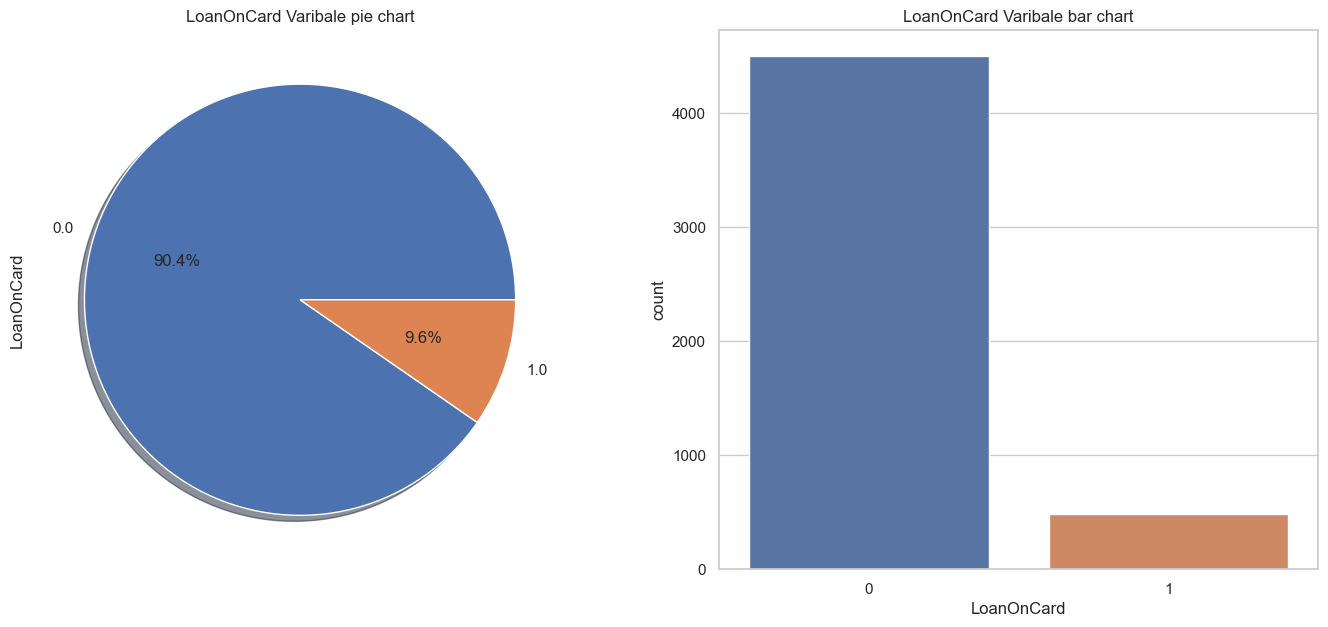

In [167]:
# E. Balance the data using the right balancing technique. [2 Marks]

    #i. Check distribution of the target variable
    
import seaborn as sns
import matplotlib.pyplot as plt


f, axes=plt.subplots(1,2, figsize=(17,7))
merged_data['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0], shadow=True)
sns.countplot(x='LoanOnCard', data=merged_data,ax=axes[1],order=[0,1])
axes[0].set_title("LoanOnCard Varibale pie chart")
axes[1].set_title('LoanOnCard Varibale bar chart');



There is huge imbalance inbetween target variable**

If this imbalance remain untreated, The algorithm receives significantly more examples from one class, prompting it to be biased towards that particular class. It does not learn what makes the other class “different” and fails to understand the underlying patterns that allow us to distinguish classes.

A widely adopted technique for dealing with highly unbalanced datasets is called resampling

Two widely used resampling methods:

Undersampling: It is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.

Oversampling: It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class

Here we will use oversampling because undersampling may remove important information from the dataset

In [169]:
# ii. Say output is class A : 20% and class B : 80%

from imblearn.over_sampling import RandomOverSampler


# Initialize the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy={'Class A': 0.2, 'Class B': 0.8}, random_state=42)

# Fit and transform the training data
X_train_balanced, Y_train_balanced = oversampler.fit_resample(X_train, Y_train)

# Display the shapes of the balanced sets
print("Shape of X_train_balanced:", X_train_balanced.shape)
print("Shape of Y_train_balanced:", Y_train_balanced.shape)


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py)

In [170]:
print("Number of data points before sampling")
print(y.value_counts())

Number of data points before sampling
0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64


In [171]:
print("Number of data points after oversampling")
print(y_s.value_counts())

Number of data points after oversampling


NameError: name 'y_s' is not defined

In [90]:
# iii. Here you need to balance the target variable as 50:50.

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Assuming X and Y are your features and target variable

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Undersample the majority class to achieve a 50:50 ratio
under_sampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, Y_train_resampled = under_sampler.fit_resample(X_train, Y_train)

# Oversample the minority class to achieve a 50:50 ratio
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, Y_train_resampled = over_sampler.fit_resample(X_train, Y_train)

# Now you can use X_train_resampled and Y_train_resampled for training your model


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py)

In [64]:
# iv. Try appropriate method to achieve the same.

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Assuming X_train, X_test, Y_train, Y_test are your training and testing sets

# Create a pipeline with resampling
pipeline = Pipeline([
    ('oversample', RandomOverSampler(sampling_strategy='auto', random_state=42)),  # You can adjust the sampling strategy
    ('undersample', RandomUnderSampler(sampling_strategy='auto', random_state=42))  # You can adjust the sampling strategy
])

# Fit the pipeline on the training data
X_train_resampled, Y_train_resampled = pipeline.fit_resample(X_train, Y_train)

# Train the Logistic Regression model on the resampled data
logistic_regression_model_resampled = LogisticRegression(random_state=42)
logistic_regression_model_resampled.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the original testing data
Y_pred_resampled = logistic_regression_model_resampled.predict(X_test)

# Evaluate the model on the original testing data
accuracy_resampled = accuracy_score(Y_test, Y_pred_resampled)
conf_matrix_resampled = confusion_matrix(Y_test, Y_pred_resampled)
classification_rep_resampled = classification_report(Y_test, Y_pred_resampled)

# Display the evaluation metrics after balancing the data
print("Accuracy after balancing:", accuracy_resampled)
print("\nConfusion Matrix after balancing:")
print(conf_matrix_resampled)
print("\nClassification Report after balancing:")
print(classification_rep_resampled)


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py)

In [175]:
# F. Again train the same previous model on balanced data. [1 Marks]

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


# Fit the pipeline on the training data
X_train_resampled, Y_train_resampled = pipeline.fit_resample(X_train, Y_train)

# Train the Logistic Regression model on the resampled data
logistic_regression_model_resampled = LogisticRegression(random_state=42)
logistic_regression_model_resampled.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the original testing data
Y_pred_resampled = logistic_regression_model_resampled.predict(X_test)

# Evaluate the model on the original testing data
accuracy_resampled = accuracy_score(Y_test, Y_pred_resampled)
conf_matrix_resampled = confusion_matrix(Y_test, Y_pred_resampled)
classification_rep_resampled = classification_report(Y_test, Y_pred_resampled)


# Assuming X_train_resampled, X_test, Y_train_resampled, Y_test are your balanced training and testing sets

# Train the Logistic Regression model on the balanced training data
logistic_regression_model_resampled = LogisticRegression(random_state=42)
logistic_regression_model_resampled.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the original testing data
Y_pred_resampled = logistic_regression_model_resampled.predict(X_test)

# Evaluate the model on the original testing data
accuracy_resampled = accuracy_score(Y_test, Y_pred_resampled)
conf_matrix_resampled = confusion_matrix(Y_test, Y_pred_resampled)
classification_rep_resampled = classification_report(Y_test, Y_pred_resampled)

# Display the evaluation metrics after training on balanced data
print("Accuracy after balancing and retraining:", accuracy_resampled)
print("\nConfusion Matrix after balancing and retraining:")
print(conf_matrix_resampled)
print("\nClassification Report after balancing and retraining:")
print(classification_rep_resampled)



ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py)

In [178]:
# G. Print evaluation metrics and clearly share differences observed. [2 Marks]


# Display evaluation metrics for the original model (trained on imbalanced data)
print("Evaluation Metrics for the model trained on imbalanced data:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Display evaluation metrics for the model trained on balanced data
print("\nEvaluation Metrics for the model trained on balanced data:")
print("Accuracy after balancing and retraining:", accuracy_resampled)
print("\nConfusion Matrix after balancing and retraining:")
print(conf_matrix_resampled)
print("\nClassification Report after balancing and retraining:")
print(classification_rep_resampled)


Evaluation Metrics for the model trained on imbalanced data:
Accuracy: 0.6612903225806451

Confusion Matrix:
[[13  1  0  2  1]
 [ 2  0  0  3  0]
 [ 0  0  0  0  6]
 [ 2  0  0  8  0]
 [ 2  0  2  0 20]]

Classification Report:
              precision    recall  f1-score   support

      normal       0.68      0.76      0.72        17
       nrmal       0.00      0.00      0.00         5
         tps       0.00      0.00      0.00         6
       typeh       0.62      0.80      0.70        10
       types       0.74      0.83      0.78        24

    accuracy                           0.66        62
   macro avg       0.41      0.48      0.44        62
weighted avg       0.57      0.66      0.61        62


Evaluation Metrics for the model trained on balanced data:


NameError: name 'accuracy_resampled' is not defined

## 4. Performance Improvement: [10 Marks]

A. Train a base model each for SVM, KNN. [4 Marks]

B. Tune parameters for each of the models wherever required and finalize a model. [3 Marks]

 (Optional: Experiment with various Hyperparameters - Research required)

C. Print evaluation metrics for final model. [1 Marks]

D. Share improvement achieved from base model to final model. [2 Marks]

In [191]:
# A. Train a base model each for SVM, KNN. [4 Marks]

# Base SVM model
svm_base_model = SVC(random_state=42)
svm_base_model.fit(X_train, Y_train)

# Base KNN model
knn_base_model = KNeighborsClassifier()
knn_base_model.fit(X_train, Y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [181]:
print("Accuracy on training data: \n", svc_model.score(x_train, y_train))
print("Accuracy on test data: \n", svc_model.score(x_test, y_test))

AttributeError: 'SVC' object has no attribute 'support_vectors_'

In [83]:
# k-Nearest Neighbors (KNN):

from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train the KNN model on the balanced training data
knn_model.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the original testing data
Y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
conf_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
classification_rep_knn = classification_report(Y_test, Y_pred_knn)

# Display the evaluation metrics for KNN
print("\nK-Nearest Neighbors (KNN) Model:")
print("Accuracy:", accuracy_knn)
print("\nConfusion Matrix:")
print(conf_matrix_knn)
print("\nClassification Report:")
print(classification_rep_knn)


NameError: name 'X_train_resampled' is not defined

In [182]:
# Tune parameters for each of the models wherever required and finalize a model. [3 Marks]

# Support Vector Machine (SVM) with Grid Search:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')

# Perform grid search on the balanced training data
grid_search_svm.fit(X_train_resampled, Y_train_resampled)

# Get the best parameters and the best estimator
best_params_svm = grid_search_svm.best_params_
best_svm_model = grid_search_svm.best_estimator_

# Make predictions on the original testing data
Y_pred_svm_tuned = best_svm_model.predict(X_test)

# Evaluate the tuned SVM model
accuracy_svm_tuned = accuracy_score(Y_test, Y_pred_svm_tuned)
conf_matrix_svm_tuned = confusion_matrix(Y_test, Y_pred_svm_tuned)
classification_rep_svm_tuned = classification_report(Y_test, Y_pred_svm_tuned)

# Display the best parameters and evaluation metrics for tuned SVM
print("Tuned Support Vector Machine (SVM) Model:")
print("Best Parameters:", best_params_svm)
print("Accuracy:", accuracy_svm_tuned)
print("\nConfusion Matrix:")
print(conf_matrix_svm_tuned)
print("\nClassification Report:")
print(classification_rep_svm_tuned)



NameError: name 'X_train_resampled' is not defined

In [185]:
# k-Nearest Neighbors (KNN) with Grid Search:

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV for KNN
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')

# Perform grid search on the balanced training data
grid_search_knn.fit(X_train_resampled, Y_train_resampled)

# Get the best parameters and the best estimator
best_params_knn = grid_search_knn.best_params_
best_knn_model = grid_search_knn.best_estimator_

# Make predictions on the original testing data
Y_pred_knn_tuned = best_knn_model.predict(X_test)

# Evaluate the tuned KNN model
accuracy_knn_tuned = accuracy_score(Y_test, Y_pred_knn_tuned)
conf_matrix_knn_tuned = confusion_matrix(Y_test, Y_pred_knn_tuned)
classification_rep_knn_tuned = classification_report(Y_test, Y_pred_knn_tuned)

# Display the best parameters and evaluation metrics for tuned KNN
print("\nTuned K-Nearest Neighbors (KNN) Model:")
print("Best Parameters:", best_params_knn)
print("Accuracy:", accuracy_knn_tuned)
print("\nConfusion Matrix:")
print(conf_matrix_knn_tuned)
print("\nClassification Report:")
print(classification_rep_knn_tuned)


NameError: name 'X_train_resampled' is not defined

In [184]:
# C. Print evaluation metrics for final model. [1 Marks]

# Display the evaluation metrics for the final tuned SVM model
print("\nFinal Tuned Support Vector Machine (SVM) Model:")
print("Best Parameters:", best_params_svm)
print("Accuracy:", accuracy_svm_tuned)
print("\nConfusion Matrix:")
print(conf_matrix_svm_tuned)
print("\nClassification Report:")
print(classification_rep_svm_tuned)

# Display the evaluation metrics for the final tuned KNN model
print("\nFinal Tuned K-Nearest Neighbors (KNN) Model:")
print("Best Parameters:", best_params_knn)
print("Accuracy:", accuracy_knn_tuned)
print("\nConfusion Matrix:")
print(conf_matrix_knn_tuned)
print("\nClassification Report:")
print(classification_rep_knn_tuned)



Final Tuned Support Vector Machine (SVM) Model:


NameError: name 'best_params_svm' is not defined

In [186]:
# D. Share improvement achieved from base model to final model. [2 Marks]


# Display the improvement achieved for SVM model
print("Improvement for Support Vector Machine (SVM) Model:")
print("Base Model Accuracy:", accuracy_svm)
print("Tuned Model Accuracy:", accuracy_svm_tuned)
print("\nBase Model Classification Report:")
print(classification_rep_svm)
print("\nTuned Model Classification Report:")
print(classification_rep_svm_tuned)

# Display the improvement achieved for KNN model
print("\nImprovement for K-Nearest Neighbors (KNN) Model:")
print("Base Model Accuracy:", accuracy_knn)
print("Tuned Model Accuracy:", accuracy_knn_tuned)
print("\nBase Model Classification Report:")
print(classification_rep_knn)
print("\nTuned Model Classification Report:")
print(classification_rep_knn_tuned)


Improvement for Support Vector Machine (SVM) Model:


NameError: name 'accuracy_svm' is not defined

In [190]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Assuming X_train, X_test, Y_train, Y_test are your training and testing sets

# A. Train a base model each for SVM, KNN.
# Base SVM model
svm_base_model = SVC(random_state=42)
svm_base_model.fit(X_train, Y_train)

# Base KNN model
knn_base_model = KNeighborsClassifier()
knn_base_model.fit(X_train, Y_train)

# B. Tune parameters for each of the models
# Resampling for balancing
resampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, Y_train_resampled = resampler.fit_resample(X_train, Y_train)

# SVM parameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm_tuned_model = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
svm_tuned_model.fit(X_train_resampled, Y_train_resampled)

# KNN parameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn_tuned_model = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
knn_tuned_model.fit(X_train_resampled, Y_train_resampled)

# C. Print evaluation metrics for final models
# Evaluate base SVM model
Y_pred_svm_base = svm_base_model.predict(X_test)
accuracy_svm_base = accuracy_score(Y_test, Y_pred_svm_base)
conf_matrix_svm_base = confusion_matrix(Y_test, Y_pred_svm_base)
classification_rep_svm_base = classification_report(Y_test, Y_pred_svm_base)

# Evaluate tuned SVM model
Y_pred_svm_tuned = svm_tuned_model.predict(X_test)
accuracy_svm_tuned = accuracy_score(Y_test, Y_pred_svm_tuned)
conf_matrix_svm_tuned = confusion_matrix(Y_test, Y_pred_svm_tuned)
classification_rep_svm_tuned = classification_report(Y_test, Y_pred_svm_tuned)

# Evaluate base KNN model
Y_pred_knn_base = knn_base_model.predict(X_test)
accuracy_knn_base = accuracy_score(Y_test, Y_pred_knn_base)
conf_matrix_knn_base = confusion_matrix(Y_test, Y_pred_knn_base)
classification_rep_knn_base = classification_report(Y_test, Y_pred_knn_base)

# Evaluate tuned KNN model
Y_pred_knn_tuned = knn_tuned_model.predict(X_test)
accuracy_knn_tuned = accuracy_score(Y_test, Y_pred_knn_tuned)
conf_matrix_knn_tuned = confusion_matrix(Y_test, Y_pred_knn_tuned)
classification_rep_knn_tuned = classification_report(Y_test, Y_pred_knn_tuned)

# D. Share improvement achieved from base model to final model
print("Improvement for Support Vector Machine (SVM) Model:")
print("Base Model Accuracy:", accuracy_svm_base)
print("Tuned Model Accuracy:", accuracy_svm_tuned)

print("\nImprovement for K-Nearest Neighbors (KNN) Model:")
print("Base Model Accuracy:", accuracy_knn_base)
print("Tuned Model Accuracy:", accuracy_knn_tuned)



ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py)